# Analiza danych zbioru o pasażerach okrętu Titanic


Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itables import show

In [3]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [4]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


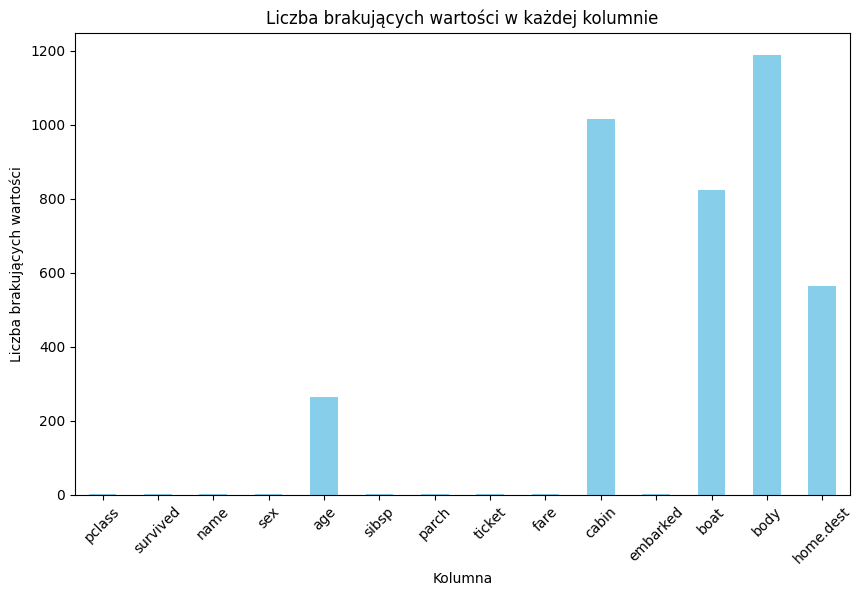

In [5]:
missing_values = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Liczba brakujących wartości w każdej kolumnie')
plt.xlabel('Kolumna')
plt.ylabel('Liczba brakujących wartości')
plt.xticks(rotation=45)
plt.show()

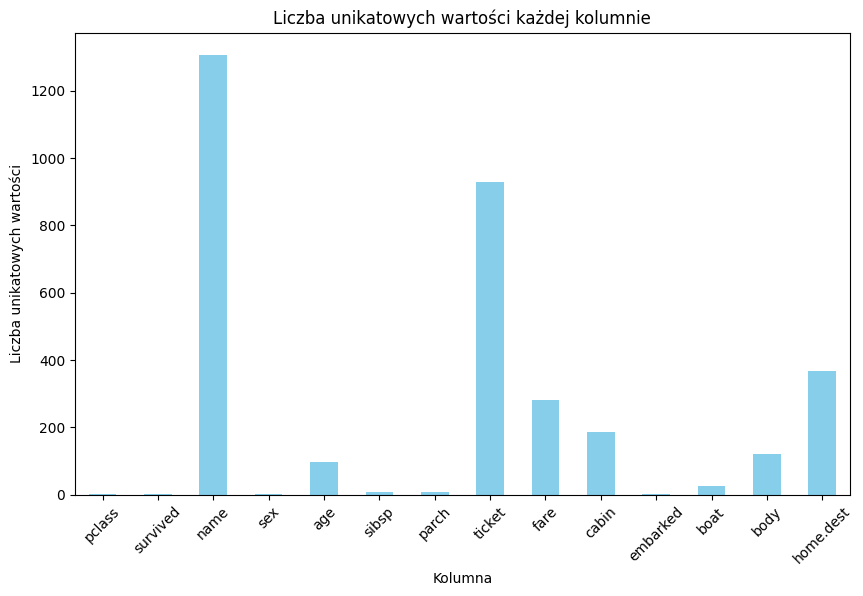

In [6]:
unique_values = df.nunique()
plt.figure(figsize=(10, 6))
unique_values.plot(kind='bar', color='skyblue')
plt.title('Liczba unikatowych wartości każdej kolumnie')
plt.xlabel('Kolumna')
plt.ylabel('Liczba unikatowych wartości')
plt.xticks(rotation=45)
plt.show()

In [7]:
df["survived"].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

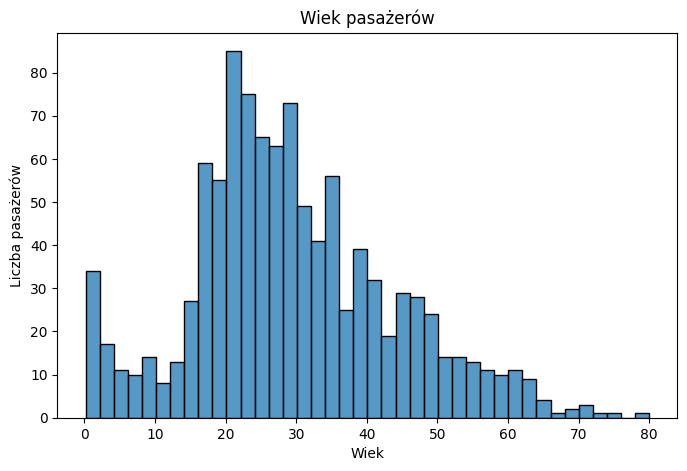

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["age"].dropna(), bins=40)
plt.title("Wiek pasażerów")
plt.xlabel("Wiek")
plt.ylabel("Liczba pasażerów")
plt.show()

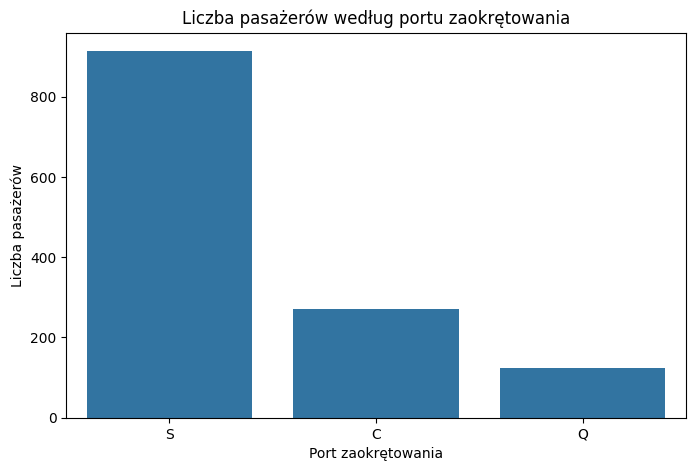

In [9]:
# Tworzenie wykresu słupkowego dla portów zaokrętowania
plt.figure(figsize=(8, 5))
sns.countplot(x=df["embarked"])

# Formatowanie wykresu
plt.xlabel("Port zaokrętowania")
plt.ylabel("Liczba pasażerów")
plt.title("Liczba pasażerów według portu zaokrętowania")

plt.show()

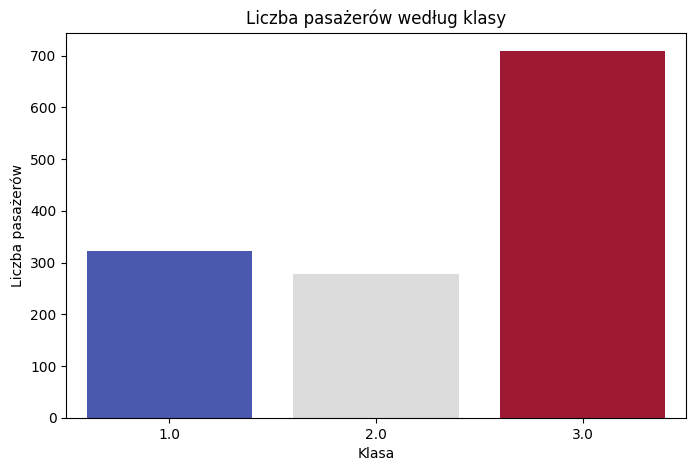

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="pclass", hue="pclass", palette="coolwarm", legend=False)
plt.title("Liczba pasażerów według klasy")
plt.xlabel("Klasa")
plt.ylabel("Liczba pasażerów")
plt.show()

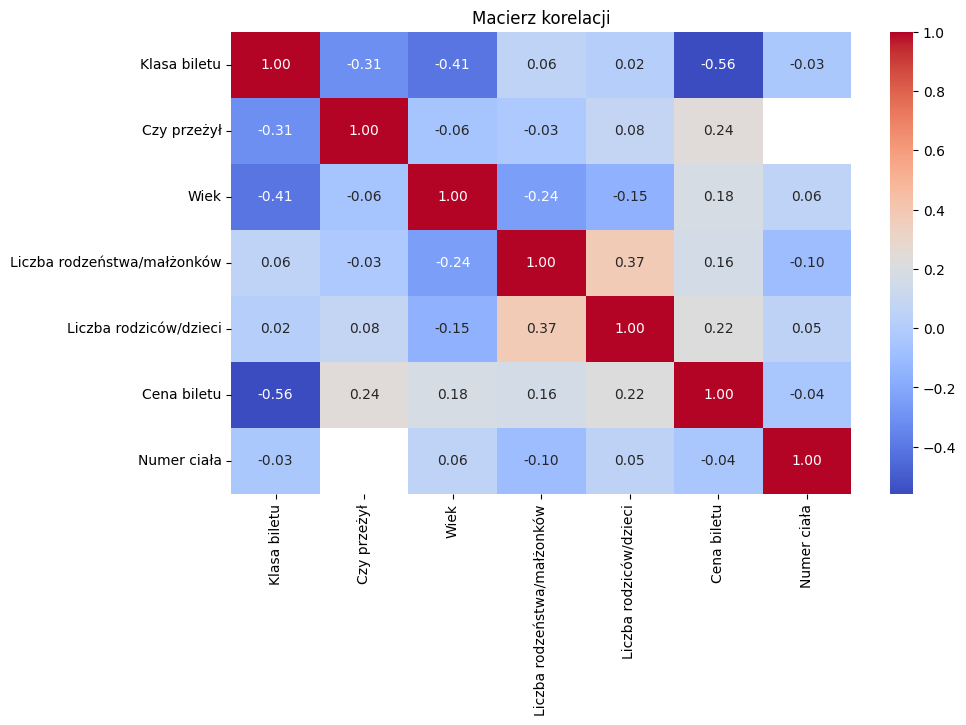

In [11]:
renamed_df = df.rename(columns={
    'passengerId': 'Numer pasażera',
    'survived': 'Czy przeżył',
    'pclass': 'Klasa biletu',
    'name': 'Imię',
    'sex': 'Płeć',
    'age': 'Wiek',
    'sibsp': 'Liczba rodzeństwa/małżonków',
    'parch': 'Liczba rodziców/dzieci',
    'ticket': 'Numer biletu',
    'fare': 'Cena biletu',
    'cbin': 'Numer kabiny',
    'boat': 'Numer szalupy',
    'body': 'Numer ciała',
    'embarked': 'Port zaokrętowania'
})
numeric_df = renamed_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji")
plt.show()


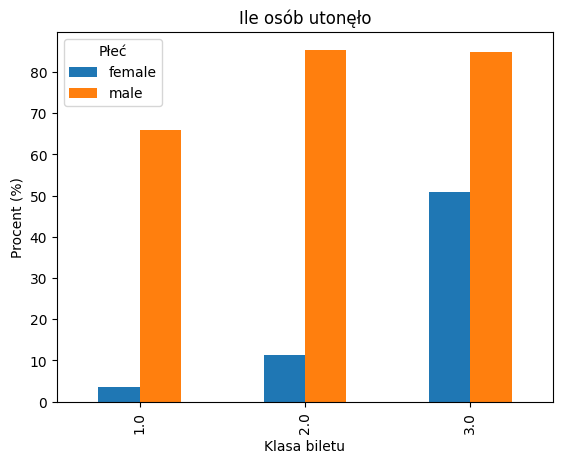

In [12]:

df_filtered = df[['pclass', 'survived', 'sex']]

# Calculate the percentage of people who drowned (did not survive) grouped by class and sex
df_drowned = df_filtered[df_filtered['survived'] == 0].groupby(['pclass', 'sex']).size() / df_filtered.groupby(['pclass', 'sex']).size() * 100

# Unstack the data for plotting
df_drowned = df_drowned.unstack()

# Plot the data
df_drowned.plot(kind='bar', stacked=False)

# Set plot title and labels
plt.title('Ile osób utonęło')
plt.xlabel('Klasa biletu')
plt.ylabel('Procent (%)')
plt.legend(title='Płeć')

# Show the plot
plt.show()


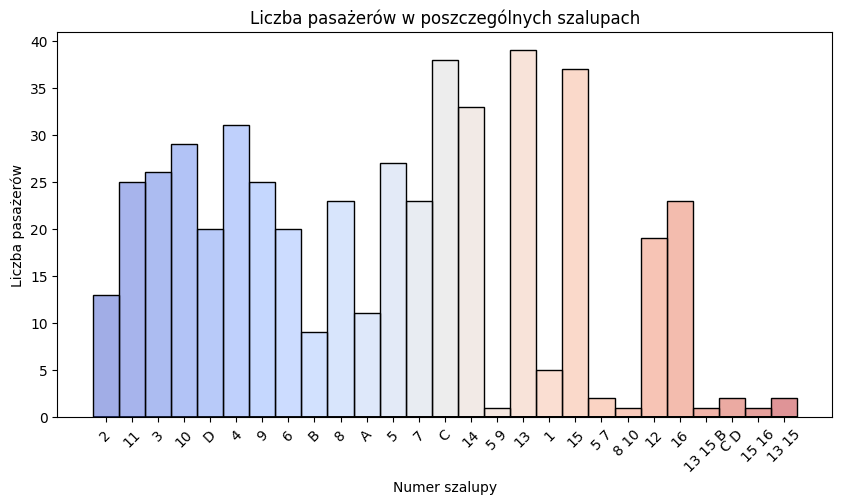

In [13]:
df_boats = df[df["boat"].notnull()]
plt.figure(figsize=(10, 5))
sns.histplot(data=df_boats, x="boat", hue="boat", 
             discrete=True, bins=len(df_boats["boat"].unique()), 
             palette="coolwarm", legend=False)
plt.xlabel("Numer szalupy")
plt.ylabel("Liczba pasażerów")
plt.title("Liczba pasażerów w poszczególnych szalupach")
plt.xticks(rotation=45)
plt.show()

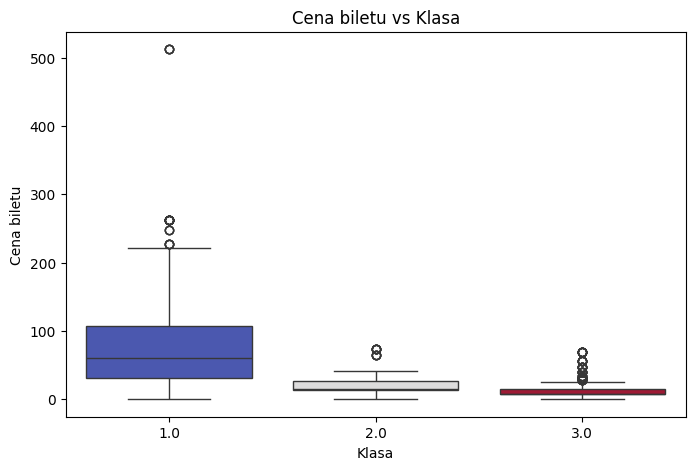

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="pclass", hue="pclass", y="fare", palette="coolwarm", legend=False)
plt.title("Cena biletu vs Klasa")
plt.xlabel("Klasa")
plt.ylabel("Cena biletu")
plt.show()

# Na titanicu z 1309 pasażerów zginęło 809, gównie mężczyzn.
# To czy pasażer przeżył miało związek z wysokością ceny biletu co może sugerować, że pasażerowie VIP mieli pierszeństwo przy szalupach.
# Cena biletu nie była uzależniona wyłącznie od klasy podróżowania. Niektórzy pasażerowie trzeciej klasy zapłacili za rejs więcej niż pasażerowie klasy pierwszej. 
# Prawdopodobnie istniała możliwość wykupienia dodatkowych usług co podnosiło cenę.
# Większość szalup nie była wypełniona nawet w połowie.

In [15]:
!jupyter nbconvert Titanic.ipynb --to html --no-input --no-prompt --output Titanic.html

[NbConvertApp] Converting notebook Titanic.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 653936 bytes to Titanic.html
